In [1]:
# Basic Imports
import sys
sys.path.insert(1, "../../")

import utils
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

# Imports for data preprocessing.
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Tensorflow imports
import tensorflow as tf

In [2]:
# Disable GPU
tf.config.set_visible_devices([], 'GPU')

In [3]:
# Constants
DATA_FILE_NAME = '../../Data/final_crypto_data.csv'
SELECTED_MONTHS = [10,11,12,1,2,3]
SELECTED_FEATURES = [
        'reddit_compound_polarity',
		# 'quote_volume_24h',
        # 'volume_change_24h',
        # 'percent_change_1h',
        # 'percent_change_24h',
        # 'percent_change_7d',
		# 'high_24h',
        # 'last_24h',
        # 'bid_24h',
        # 'vwap_24h',
        # 'volume_24h',
        # 'low_24h',
        # 'ask_24h',
        # 'open_24h',
        'volume_1min',
        'high_1min',
        'low_1min',
        'open_1min',
        'close_1min'
    ]

In [4]:
df = pd.read_csv(DATA_FILE_NAME)
df = df[::60]
df

,Unnamed: 0,_id,high_24h,last_24h,unix_timestamp,bid_24h,vwap_24h,volume_24h,low_24h,ask_24h,...,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,reddit_compound_polarity
0,0,627127fabbd592fa2c7f25a9,62971.54,62561.13,1635527368,62559.74,60908.08,5113.537402,56425.00,62561.13,...,-0.314446,2.307206,2.108769,26.873643,29.933036,49.972913,1.179682e+12,43.4826,1.313676e+12,0.000834
60,60,627127fabbd592fa2c7f25e5,62971.54,62397.10,1635530994,62394.14,60962.99,5204.297994,56425.00,62404.25,...,-0.280623,1.947506,2.811090,26.873643,29.034676,49.972913,1.176295e+12,43.4826,1.309904e+12,0.044513
120,120,627127fabbd592fa2c7f2621,62971.54,62123.32,1635534444,62110.79,61347.36,4476.700494,59542.11,62124.20,...,-0.502020,3.646022,2.854153,26.873643,27.902601,49.983726,1.171305e+12,43.4826,1.304340e+12,0.163515
180,180,627127fabbd592fa2c7f265d,62971.54,62359.36,1635538303,62350.16,61408.04,4408.004663,60154.53,62359.36,...,0.375498,0.439496,1.973032,26.873643,28.332142,49.849687,1.176116e+12,43.4826,1.309691e+12,0.000000
240,240,627127fabbd592fa2c7f2699,62971.54,62480.44,1635541805,62463.78,61413.17,4217.489249,60154.53,62480.44,...,0.114540,2.278869,2.628106,26.873643,28.708223,49.937448,1.177761e+12,43.4826,1.311523e+12,0.086260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246540,246540,62712800bbd592fa2c82e8b5,40387.00,39759.16,1651190902,39740.89,39637.05,1845.009619,38880.44,39759.06,...,-0.027434,1.417166,-1.612760,-16.063840,5.345086,5.094061,7.562040e+11,41.5884,8.347048e+11,0.597300
246600,246600,62712800bbd592fa2c82e8f1,40387.00,39841.97,1651194540,39827.93,39652.28,1798.985627,38880.44,39841.97,...,0.172282,0.808820,-1.478942,-15.586819,5.749135,5.315253,7.575096e+11,41.5885,8.361428e+11,0.361200
246660,246660,62712800bbd592fa2c82e92d,38786.95,38325.77,1651345020,38317.00,38512.75,633.961235,38160.40,38339.97,...,-0.008171,-0.424589,-3.615547,-16.740755,-12.567656,1.051482,7.282702e+11,42.0814,8.037991e+11,-0.437861
246720,246720,62712800bbd592fa2c82e969,38786.95,38414.87,1651348288,38382.42,38519.83,594.586166,38160.40,38407.03,...,0.270777,0.247061,-3.430754,-16.083945,-12.392731,2.109056,7.302011e+11,42.0843,8.059303e+11,0.190067


In [5]:
# Drop unnecessary columns
df = utils.setDateTimeAsIndex(df)
df = utils.filterColumns(df, SELECTED_FEATURES)
df = utils.filterInMonths(df, SELECTED_MONTHS)
df

,reddit_compound_polarity,volume_1min,high_1min,low_1min,open_1min,close_1min
datetime,,,,,,
2021-10-29 17:09:28,0.000834,1.425169,62565.90,62539.20,62545.45,62561.86
2021-10-29 18:09:54,0.044513,3.846862,62407.86,62368.24,62385.41,62397.57
2021-10-29 19:07:24,0.163515,0.003650,62123.32,62118.99,62118.99,62123.32
2021-10-29 20:11:43,0.000000,0.532779,62380.94,62340.30,62380.94,62374.66
2021-10-29 21:10:05,0.086260,0.000000,62480.44,62480.44,62480.44,62480.44
...,...,...,...,...,...,...
2022-03-29 10:16:54,0.135572,0.005280,47552.35,47552.35,47552.35,47552.35
2022-03-29 11:21:32,0.000000,0.029528,47685.30,47653.42,47674.34,47653.42
2022-03-29 12:17:02,0.380745,0.000000,47980.00,47980.00,47980.00,47980.00


In [6]:
# check for null values per column
print("NaN values per column count: \n")
df.isna().sum()

NaN values per column count: 



reddit_compound_polarity    0
volume_1min                 0
high_1min                   0
low_1min                    0
open_1min                   0
close_1min                  0
dtype: int64

In [7]:
values = df.values
i = 1

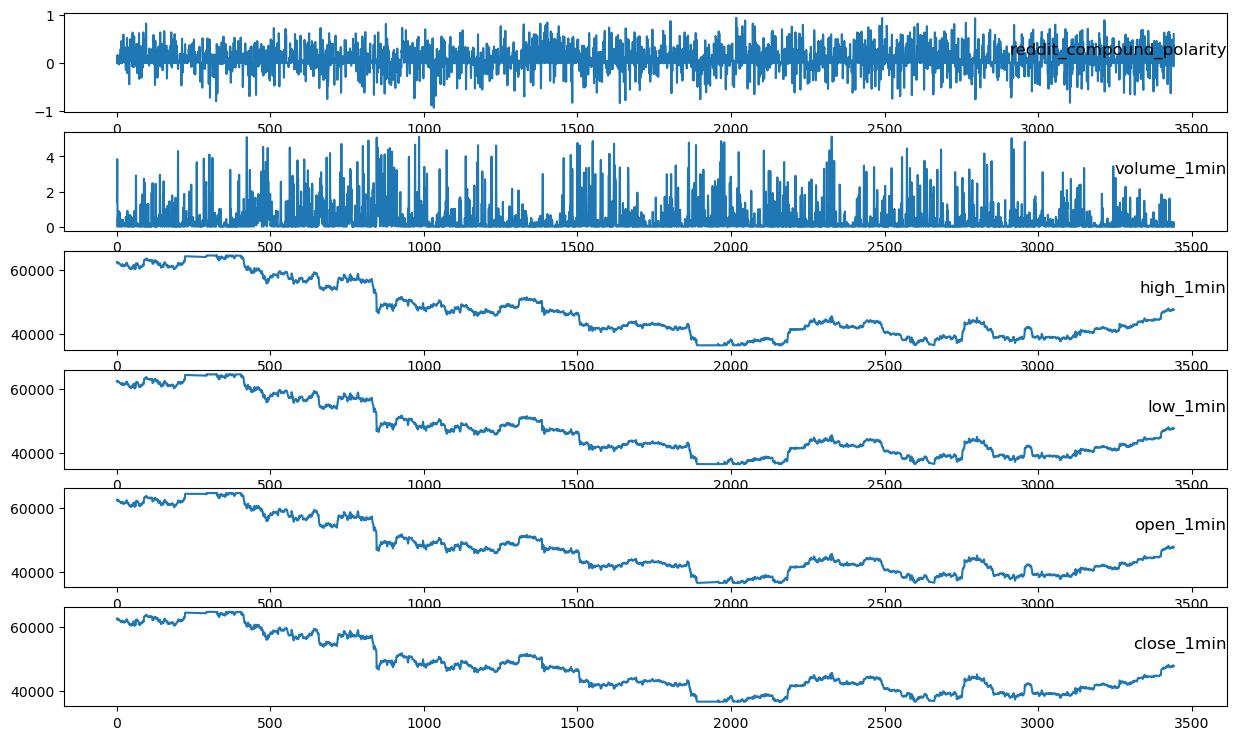

In [8]:
# plot each column
plt.figure(figsize=(15,9))
for group in range(len(SELECTED_FEATURES)) :
	plt.subplot(len(SELECTED_FEATURES), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [9]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True, doPrints=False):
	"""
	:param data: Ta data pou theloume na metasximatisoume se numpy Array
	:param n_in: to plithos ton Lags pou tha exei i input series (X)
	:param n_out: to plithos ton Lags pou tha exei i output series (y)
	:param dropnan: ama theloume na kanoume drop ta nan valuws
	:return: epistrefei tin metasximatismeni lista se multivariate time series.
	"""

	# vreiskei to n_vars
	# an ta data einai list = 1
	# alliws pernei to shape ton data.
	n_vars = 1 if type(data) is list else data.shape[1]

	# kanoume ta data DataFrame
	mDf = pd.DataFrame(data)
	if doPrints:
		print(mDf)

	# ftiaxnei 2 adies listes. mia fia ta
	cols, names = list(), list()
	if doPrints:
		print(n_vars)

	# ftiaxnoume to input series X. (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		# kanoume append sto cols to dataframe olistimeno kata i rows
		cols.append(mDf.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

	# ftiaxnoume to forecast sequence y (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(mDf.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

	if doPrints:
		print(cols)
		print(names)

	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [10]:
# get dataframe values.
values = df.values
values

array([[ 8.33660422e-04,  1.42516865e+00,  6.25659000e+04,
         6.25392000e+04,  6.25454500e+04,  6.25618600e+04],
       [ 4.45128571e-02,  3.84686158e+00,  6.24078600e+04,
         6.23682400e+04,  6.23854100e+04,  6.23975700e+04],
       [ 1.63514706e-01,  3.65000000e-03,  6.21233200e+04,
         6.21189900e+04,  6.21189900e+04,  6.21233200e+04],
       ...,
       [ 3.80745192e-01,  0.00000000e+00,  4.79800000e+04,
         4.79800000e+04,  4.79800000e+04,  4.79800000e+04],
       [-7.53612613e-02,  2.57735150e-01,  4.78626100e+04,
         4.78410100e+04,  4.78524500e+04,  4.78585200e+04],
       [ 5.98673783e-01,  2.85000000e-03,  4.77085300e+04,
         4.77085300e+04,  4.77085300e+04,  4.77085300e+04]])

In [11]:
# Ensure all data are float.
values = values.astype('float32')
values

array([[ 8.3366042e-04,  1.4251686e+00,  6.2565898e+04,  6.2539199e+04,
         6.2545449e+04,  6.2561859e+04],
       [ 4.4512857e-02,  3.8468616e+00,  6.2407859e+04,  6.2368238e+04,
         6.2385410e+04,  6.2397570e+04],
       [ 1.6351470e-01,  3.6500001e-03,  6.2123320e+04,  6.2118988e+04,
         6.2118988e+04,  6.2123320e+04],
       ...,
       [ 3.8074520e-01,  0.0000000e+00,  4.7980000e+04,  4.7980000e+04,
         4.7980000e+04,  4.7980000e+04],
       [-7.5361259e-02,  2.5773516e-01,  4.7862609e+04,  4.7841012e+04,
         4.7852449e+04,  4.7858520e+04],
       [ 5.9867376e-01,  2.8500000e-03,  4.7708531e+04,  4.7708531e+04,
         4.7708531e+04,  4.7708531e+04]], dtype=float32)

In [12]:
# Normalize Continues Features.
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)
scaled_values

array([[5.0007963e-01, 2.7746952e-01, 9.2516720e-01, 9.2492819e-01,
        9.2472172e-01, 9.2539191e-01],
       [5.2329063e-01, 7.4895477e-01, 9.1954005e-01, 9.1884208e-01,
        9.1902423e-01, 9.1954303e-01],
       [5.8652782e-01, 7.1062736e-04, 9.0940893e-01, 9.0996909e-01,
        9.0953970e-01, 9.0977931e-01],
       ...,
       [7.0196348e-01, 0.0000000e+00, 4.0582776e-01, 4.0663660e-01,
        4.0619028e-01, 4.0625870e-01],
       [4.5958987e-01, 5.0179083e-02, 4.0164804e-01, 4.0168881e-01,
        4.0164948e-01, 4.0193379e-01],
       [8.1777006e-01, 5.5487338e-04, 3.9616191e-01, 3.9697266e-01,
        3.9652598e-01, 3.9659405e-01]], dtype=float32)

In [13]:
# specify the number of lag hours
n_hours = 10
n_features = len(SELECTED_FEATURES)
n_obs = n_hours * n_features

In [14]:
# prepare data for lstm
reframed = series_to_supervised(scaled_values, n_in=n_hours,n_out=1)
reframed

,var1(t-10),var2(t-10),var3(t-10),var4(t-10),var5(t-10),var6(t-10),var1(t-9),var2(t-9),var3(t-9),var4(t-9),...,var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
10,0.500080,0.277470,0.925167,0.924928,0.924722,0.925392,0.523291,0.748955,0.919540,0.918842,...,0.903446,0.902843,0.902413,0.902892,0.503237,0.018200,0.901432,0.901941,0.901511,0.901803
11,0.523291,0.748955,0.919540,0.918842,0.919024,0.919543,0.586528,0.000711,0.909409,0.909969,...,0.901432,0.901941,0.901511,0.901803,0.499637,0.086940,0.900110,0.900021,0.899716,0.900481
12,0.586528,0.000711,0.909409,0.909969,0.909540,0.909779,0.499637,0.103728,0.918582,0.917848,...,0.900110,0.900021,0.899716,0.900481,0.651534,0.000000,0.891705,0.892423,0.891993,0.892078
13,0.499637,0.103728,0.918582,0.917848,0.918865,0.918727,0.545475,0.000000,0.922125,0.922837,...,0.891705,0.892423,0.891993,0.892078,0.499637,0.002649,0.887807,0.888525,0.888095,0.888180
14,0.545475,0.000000,0.922125,0.922837,0.922407,0.922493,0.490535,0.175261,0.916546,0.915934,...,0.887807,0.888525,0.888095,0.888180,0.741188,0.000789,0.893750,0.894467,0.894037,0.894122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,0.499637,0.311658,0.382559,0.382468,0.382925,0.382088,0.810557,0.002315,0.384900,0.384708,...,0.396460,0.397271,0.396824,0.396892,0.571679,0.001028,0.390601,0.391413,0.390966,0.391034
3439,0.810557,0.002315,0.384900,0.384708,0.384261,0.385333,0.471490,0.031828,0.390281,0.389987,...,0.390601,0.391413,0.390966,0.391034,0.499637,0.005749,0.395335,0.395011,0.395309,0.394632
3440,0.471490,0.031828,0.390281,0.389987,0.390646,0.389608,0.499637,0.000475,0.384685,0.385498,...,0.395335,0.395011,0.395309,0.394632,0.701963,0.000000,0.405828,0.406637,0.406190,0.406259
3441,0.499637,0.000475,0.384685,0.385498,0.385051,0.385118,0.161190,0.000132,0.383956,0.384769,...,0.405828,0.406637,0.406190,0.406259,0.459590,0.050179,0.401648,0.401689,0.401649,0.401934


In [15]:
def train_test_valid_split(total_x, total_y, train_size=0.8, valid_size=0.1) :
    train_index = int(len(total_x) * train_size)
    valid_index = int(len(total_x) * valid_size)

    X_train, y_train = total_x[0 :train_index], total_y[0 :train_index]
    X_valid, y_valid = total_x[train_index :train_index + valid_index], total_y[train_index :train_index + valid_index]
    X_test, y_test = total_x[train_index + valid_index :], total_y[train_index + valid_index :]

    print("-------- train test valid split --------")
    print(len(X_train)), print(len(y_train))
    print(len(X_valid)), print(len(y_valid))
    print(len(X_test)), print(len(y_test))
    print("----------------------------------------")

    return np.array(X_train), \
           np.array(y_train), \
           np.array(X_valid), \
           np.array(y_valid), \
           np.array(X_test), \
           np.array(y_test)

In [16]:
# split into train and test sets
values = reframed.values
# cutoff = round(0.70 * len(values))
# values = values[cutoff:,:]
values

array([[5.0007963e-01, 2.7746952e-01, 9.2516720e-01, ..., 9.0194058e-01,
        9.0151095e-01, 9.0180349e-01],
       [5.2329063e-01, 7.4895477e-01, 9.1954005e-01, ..., 9.0002131e-01,
        8.9971590e-01, 9.0048122e-01],
       [5.8652782e-01, 7.1062736e-04, 9.0940893e-01, ..., 8.9242291e-01,
        8.9199281e-01, 8.9207768e-01],
       ...,
       [4.7149029e-01, 3.1828318e-02, 3.9028132e-01, ..., 4.0663660e-01,
        4.0619028e-01, 4.0625870e-01],
       [4.9963662e-01, 4.7504948e-04, 3.8468480e-01, ..., 4.0168881e-01,
        4.0164948e-01, 4.0193379e-01],
       [1.6118988e-01, 1.3239085e-04, 3.8395631e-01, ..., 3.9697266e-01,
        3.9652598e-01, 3.9659405e-01]], dtype=float32)

In [17]:
X =  values[:,:n_obs]
X

array([[5.0007963e-01, 2.7746952e-01, 9.2516720e-01, ..., 9.0284276e-01,
        9.0241289e-01, 9.0289235e-01],
       [5.2329063e-01, 7.4895477e-01, 9.1954005e-01, ..., 9.0194058e-01,
        9.0151095e-01, 9.0180349e-01],
       [5.8652782e-01, 7.1062736e-04, 9.0940893e-01, ..., 9.0002131e-01,
        8.9971590e-01, 9.0048122e-01],
       ...,
       [4.7149029e-01, 3.1828318e-02, 3.9028132e-01, ..., 3.9501083e-01,
        3.9530885e-01, 3.9463198e-01],
       [4.9963662e-01, 4.7504948e-04, 3.8468480e-01, ..., 4.0663660e-01,
        4.0619028e-01, 4.0625870e-01],
       [1.6118988e-01, 1.3239085e-04, 3.8395631e-01, ..., 4.0168881e-01,
        4.0164948e-01, 4.0193379e-01]], dtype=float32)

In [18]:
y = values[:,-1]
y

array([0.9018035 , 0.9004812 , 0.8920777 , ..., 0.4062587 , 0.4019338 ,
       0.39659405], dtype=float32)

In [19]:
train_X, train_y, valid_X, valid_y, test_X, test_y = train_test_valid_split(
	X,
	y,
	train_size=0.8,
	valid_size=0.1
)
print("----------------------------")
print(f"-------- Train X: {train_X.shape}, Train y: {train_y.shape} --------")
print(f"-------- Valid X: {valid_X.shape}, Valid y: {valid_y.shape} --------")
print(f"-------- Test X: {test_X.shape}, Test y: {test_y.shape} --------")
print("----------------------------\n")

-------- train test valid split --------
2746
2746
343
343
344
344
----------------------------------------
----------------------------
-------- Train X: (2746, 60), Train y: (2746,) --------
-------- Valid X: (343, 60), Valid y: (343,) --------
-------- Test X: (344, 60), Test y: (344,) --------
----------------------------



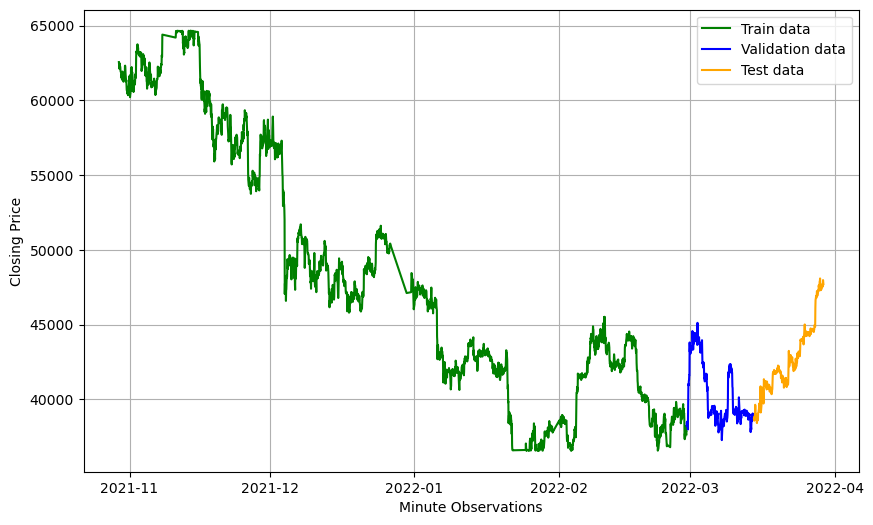

In [20]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(df['close_1min'][:len(train_y)], 'green', label='Train data')
plt.plot(df['close_1min'][len(train_y):len(train_y)+len(valid_y)], 'blue', label='Validation data')
plt.plot(df['close_1min'][len(train_y)+len(valid_y):], 'orange', label='Test data')
plt.legend()

In [21]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
valid_X = valid_X.reshape((valid_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, valid_X.shape, valid_y.shape)

(2746, 10, 6) (2746,) (343, 10, 6) (343,)


In [22]:
 # Network Configurations
EPOCHS = 100
BATCH_SIZE = 32

In [23]:
# design network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(
	100,
	# return_sequences=True,
	# activation='relu',
	# unroll=True,
	input_shape=(train_X.shape[1], train_X.shape[2]),
))
# model.add(tf.keras.layers.Dropout(0.1))
# model.add(tf.keras.layers.LSTM(
# 	64,
# 	activation='relu',
# 	# unroll=True,
# ))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(Dense(BATCH_SIZE))
# model.add(tf.keras.layers.Dense(4))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(4))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) , loss='mse')

In [24]:
 # fit network
history = model.fit(
	train_X,
	train_y,
	epochs=EPOCHS,
	batch_size=BATCH_SIZE,
	validation_data=(valid_X, valid_y),
	verbose=2,
	shuffle=False
)

Epoch 1/100


2023-01-15 21:09:54.409305: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


86/86 - 2s - loss: 0.0212 - val_loss: 8.4113e-04 - 2s/epoch - 18ms/step
Epoch 2/100
86/86 - 0s - loss: 0.0037 - val_loss: 6.5679e-04 - 406ms/epoch - 5ms/step
Epoch 3/100
86/86 - 0s - loss: 0.0022 - val_loss: 5.0167e-04 - 397ms/epoch - 5ms/step
Epoch 4/100
86/86 - 0s - loss: 0.0016 - val_loss: 4.5215e-04 - 392ms/epoch - 5ms/step
Epoch 5/100
86/86 - 0s - loss: 0.0012 - val_loss: 4.4187e-04 - 385ms/epoch - 4ms/step
Epoch 6/100
86/86 - 0s - loss: 0.0011 - val_loss: 4.3392e-04 - 390ms/epoch - 5ms/step
Epoch 7/100
86/86 - 0s - loss: 0.0011 - val_loss: 4.2509e-04 - 390ms/epoch - 5ms/step
Epoch 8/100
86/86 - 0s - loss: 0.0011 - val_loss: 4.1590e-04 - 396ms/epoch - 5ms/step
Epoch 9/100
86/86 - 0s - loss: 0.0012 - val_loss: 4.0626e-04 - 393ms/epoch - 5ms/step
Epoch 10/100
86/86 - 0s - loss: 0.0012 - val_loss: 3.9616e-04 - 396ms/epoch - 5ms/step
Epoch 11/100
86/86 - 0s - loss: 0.0012 - val_loss: 3.8575e-04 - 387ms/epoch - 4ms/step
Epoch 12/100
86/86 - 0s - loss: 0.0012 - val_loss: 3.7523e-04 - 39

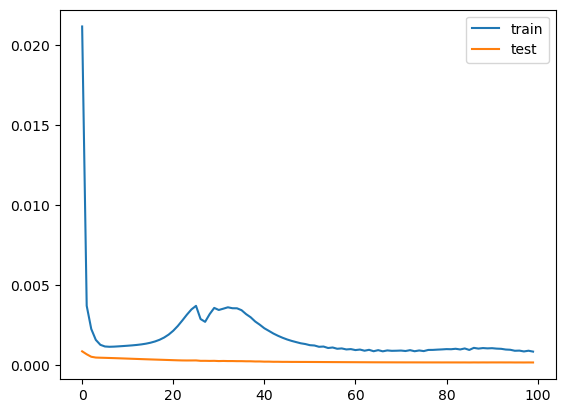

In [25]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [26]:
# make a prediction
yhat = model.predict(valid_X)
valid_X = valid_X.reshape((valid_X.shape[0], n_hours*n_features))
valid_X

11/11 [==============================] - 0s 2ms/step


array([[0.5270567 , 0.00218055, 0.06037462, ..., 0.15940833, 0.15895379,
        0.15901363],
       [0.30166698, 0.        , 0.06674409, ..., 0.15605736, 0.1556027 ,
        0.15566242],
       [0.49983057, 0.00447598, 0.06340635, ..., 0.16496849, 0.16504943,
        0.16590095],
       ...,
       [0.25726646, 0.18139099, 0.08719194, ..., 0.109797  , 0.10982132,
        0.10939896],
       [0.38666734, 0.01554298, 0.08612728, ..., 0.10518897, 0.10574055,
        0.10530043],
       [0.41959465, 0.01006365, 0.08532941, ..., 0.08198667, 0.0815295 ,
        0.08224177]], dtype=float32)

In [27]:
# invert scaling for forecast
inv_yhat = np.concatenate((valid_X[:, -(n_features-1):], yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]

In [28]:
# invert scaling for actual
valid_y_new = valid_y.reshape((len(valid_y), 1))
inv_y = np.concatenate((valid_X[:, -(n_features-1):], valid_y_new), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [29]:
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 336.747


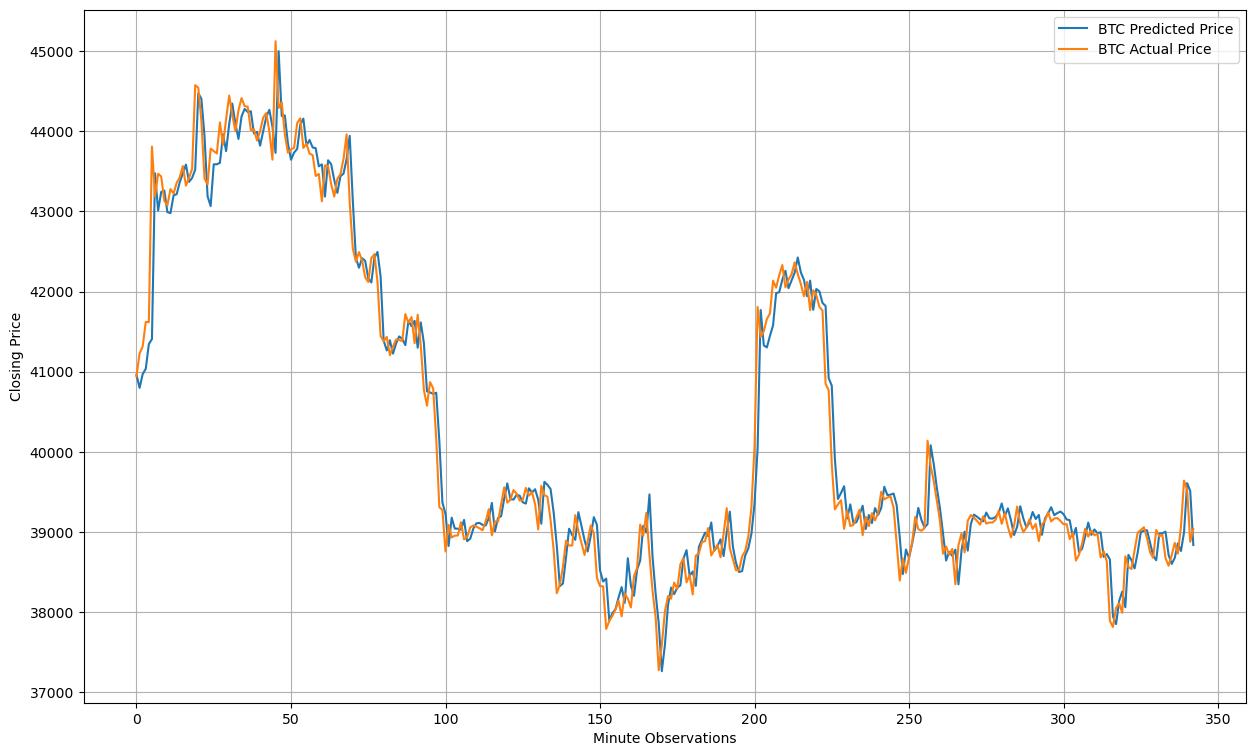

In [30]:
plt.figure(figsize=(15,9))
plt.grid(True)

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(inv_yhat, label='BTC Predicted Price')
plt.plot(inv_y, label='BTC Actual Price')
plt.legend()

In [31]:
test_yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
test_X

11/11 [==============================] - 0s 1ms/step


array([[8.7416852e-01, 4.0812992e-02, 7.4684858e-02, ..., 8.8306189e-02,
        8.8580847e-02, 8.7906718e-02],
       [7.4221468e-01, 7.7876973e-04, 7.1142316e-02, ..., 7.4458241e-02,
        8.0179930e-02, 7.4632883e-02],
       [4.9963662e-01, 2.6478320e-01, 7.6085806e-02, ..., 8.2396746e-02,
        8.1939697e-02, 8.1996918e-02],
       ...,
       [4.7149029e-01, 3.1828318e-02, 3.9028132e-01, ..., 3.9501083e-01,
        3.9530885e-01, 3.9463198e-01],
       [4.9963662e-01, 4.7504948e-04, 3.8468480e-01, ..., 4.0663660e-01,
        4.0619028e-01, 4.0625870e-01],
       [1.6118988e-01, 1.3239085e-04, 3.8395631e-01, ..., 4.0168881e-01,
        4.0164948e-01, 4.0193379e-01]], dtype=float32)

In [32]:
# invert scaling for forecast
test_inv_yhat = np.concatenate((test_X[:, -(n_features-1):], test_yhat), axis=1)
test_inv_yhat = scaler.inverse_transform(test_inv_yhat)
test_inv_yhat = test_inv_yhat[:,-1]

In [33]:
# invert scaling for actual
test_y_new = test_y.reshape((len(test_y), 1))
test_inv_y = np.concatenate((test_X[:, -(n_features-1):], test_y_new), axis=1)
test_inv_y = scaler.inverse_transform(test_inv_y)
test_inv_y = test_inv_y[:,-1]

In [34]:
# calculate RMSE
rmse = sqrt(mean_squared_error(test_inv_y, test_inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 274.033


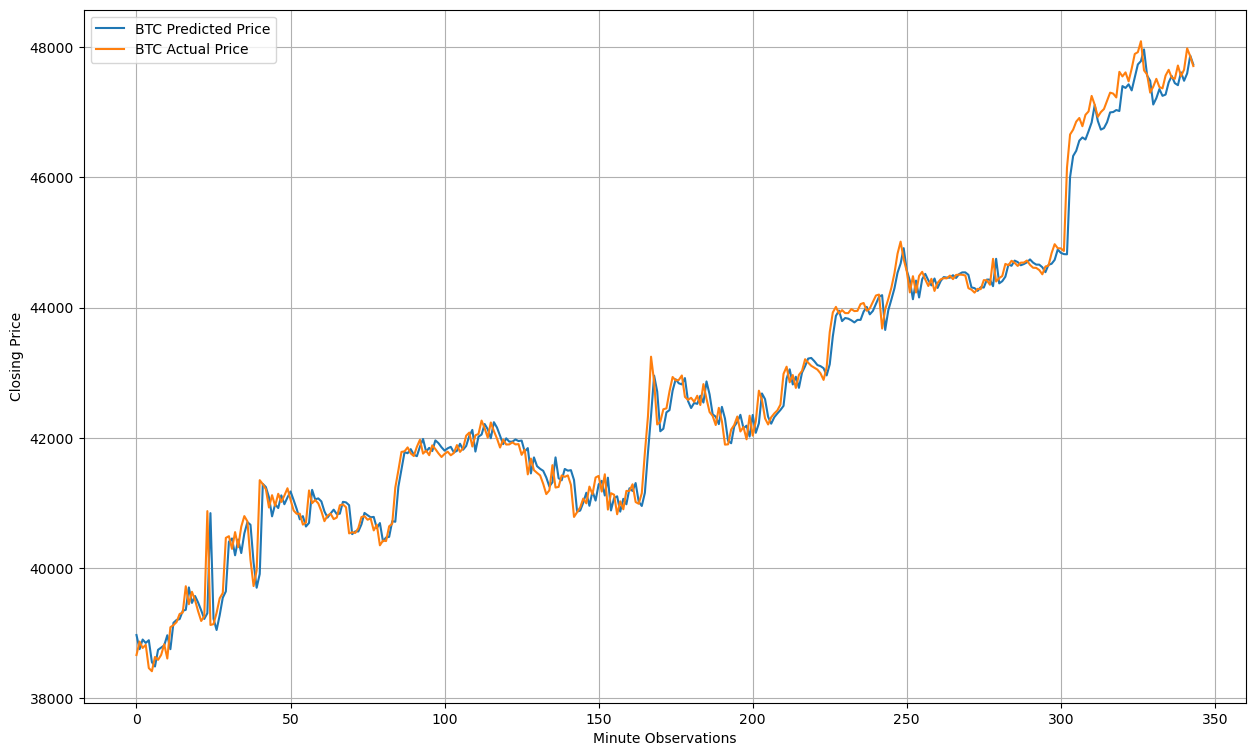

In [35]:
plt.figure(figsize=(15,9))
plt.grid(True)

plt.xlabel('Minute Observations')
plt.ylabel('Closing Price')
plt.plot(test_inv_yhat, label='BTC Predicted Price')
plt.plot(test_inv_y, label='BTC Actual Price')
plt.legend()